# <center>Воспроизводимость и контейнеризация приложений
## <center>Воспроизводимость
Код, разрабатываемый дата-сайентистом, должен быть воспроизводимым в постоянно меняющихся в условиях:
* меняются данные, поступающие на вход;
* трансформируются пайплайны предобработки данных;
* постоянно изменяются гиперпараметры алгоритмов;
* иногда модифицируются или вовсе удаляются алгоритмы популярных библиотек.

В идеале ожидается, что выполнение кода должно приводить к одинаковым результатам в различных условиях.

**Воспроизводимость результатов** является одним из главных показателей качества модели. Именно поэтому обеспечение воспроизводимости — одна из важнейших проблем в современном ML-инжиниринге.

Мы можем доверять результату, полученному с помощью модели, только когда доподлинно известно, на какой выборке и с каким пайплайном предобработки она была построена. Кроме того, ожидается, что результаты будут консистентными (согласованными с исходными данными), так как необходимо однозначно понимать, какое изменение привело к улучшению или ухудшению результатов.

На схеме приведён классический пайплайн работы над моделью:

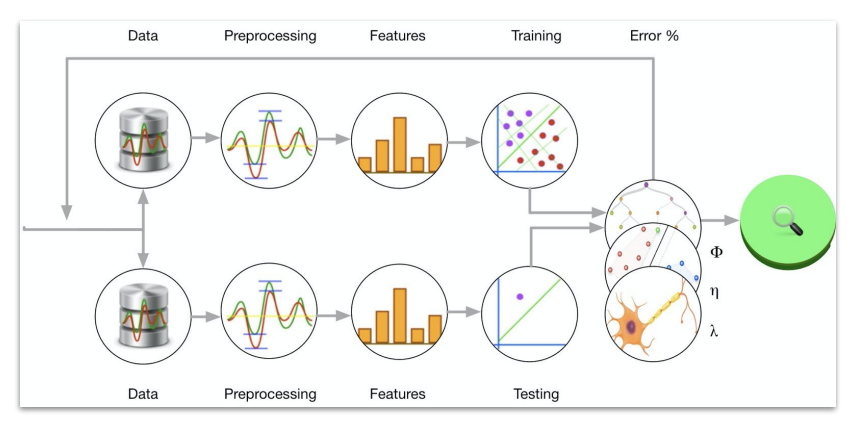

**ИНСТРУМЕНТЫ ОБЕСПЕЧЕНИЯ ВОСПРОИЗВОДИМОСТИ:**
* **Версионирование кода.**  
    Обычно весь пайплайн представлен в виде частей кода, для работы с которым используется знакомая нам распределённая система управления версиями Git в совокупности с хостингом GitHub.

* **Версионирование артефактов.**  
    В процессе работы над проектом появляются различные артефакты: датасеты, модели, файлы конфигурации и прочее. Для их версионирования обычно используются такие инструменты, как DVC и Sonatype Nexus.

* **Виртуализация и контейнеризация.**  
    Одним из важнейших аспектов воспроизводимости является настройка окружения.

    >**Виртуализация** — это технология изоляции, сохранения состояния и воспроизведения окружения. Благодаря ей вы можете воссоздать на другом компьютере точную копию вашего окружения и тем самым обеспечить воспроизводимость.

    Однако иногда воссоздания окружения недостаточно и необходимо обеспечить не только воспроизводимость версий библиотек, но и воспроизводимость среды выполнения программы — операционной системы, на которой реализован проект. Для этого прибегают к инструментам **контейнеризации**, таким как *Docker*.

* **Управление экспериментами.**  
    Для каждого запуска обучения необходимо фиксировать настройки гиперпараметров и сохранять их. В этом помогают системы управления экспериментами, например MLflow.




# <center>Виртуализация и изолированность. Virtualenv
Намного проще создать для каждого проекта виртуальную среду, изолированную от основной системы. Тогда каждый из проектов будет иметь свои **независимые настройки**, в том числе разные библиотеки и их версии.

Когда мы говорим про изолированность, мы имеем в виду, что приложение будет запускаться в своей отдельной среде и таким образом не зависеть от ОС и настроек системы, на которой мы его разворачиваем.

## <center>Virtualenv
Одним из наиболее популярных инструментов для создания изолированных сред в *Python* является *virtualenv*. Он обеспечивает работоспособность сервисов вне зависимости от того, какие они имеют зависимости.

Предварительно создайте в своей операционной системе папку с именем `project_a`. Эта папка будет имитировать папку проекта, и на её основе мы продемонстрируем работу виртуальных окружений. Перейдите в созданную папку в терминале (команда `cd /путь/до/папки`) или откройте её в вашей *IDE*.

Чтобы создать новую среду, необходимо набрать в терминале команду:

`python -m venv <название сервиса>`

После этого в вашей текущей директории появится папка проекта с именем, которое вы указали в команде `venv`.

Папка с настройками виртуальной среды будет иметь следующий вид (имена файлов могут незначительно отличаться в зависимости от версии Python, которую вы используете):

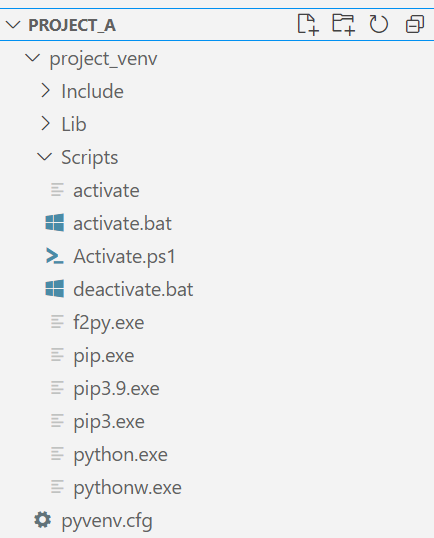

Директория *Scripts* — это аналог директории *bin* в *UNIX*-системах: в ней лежат файлы, которые взаимодействуют со средой, например файлы для активации и деактивации среды.

В папке *Lib* содержится копия *python* и все зависимости (библиотеки и их версии).

Чтобы активировать виртуальное окружение в *Windows*, необходимо в командной строке запустить файл *Activate.ps1*:

`project_a_venv/Scripts/Activate.ps1`

Если после выполнения описанных выше действий активация среды продолжает вызывать ошибку, ввести в терминале:

`Set-ExecutionPolicy -Scope CurrentUser Unrestricted`

Если команда выполнилась успешно, вы увидите, что перед приглашением в командной строке появилась дополнительная надпись, совпадающая с именем виртуального окружения. В результате выполнения команды мы увидим следующее:

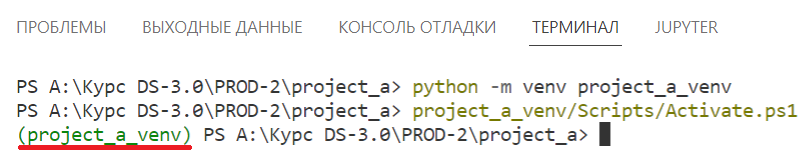

Выделенная красным строка говорит нам, что мы находимся в изолированном окружении *project_a_venv*.

Таким образом вы полностью изолируете окружение своего проекта и можете установить все необходимые для работы проекта версии пакетов — эти версии не будут отражены в глобальном окружении *Python* и будут зафиксированы только в активированном виртуальном окружении.

Например, выполним команду для установки библиотеки `scikit-learn`:

`(project_a_venv) $ pip install scikit-learn`

Чтобы выйти из виртуального окружения в область глобального окружения, необходимо ввести в терминале следующую команду:

`deactivate`

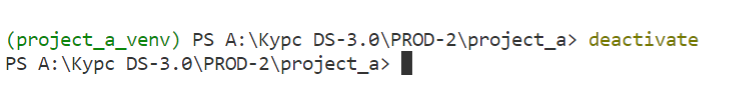

# <center>Virtualenv и  VS Code
Если вы разрабатываете свои программы в *IDE*, например в *VS Code*, то перемещаться между виртуальными окружениями становится совсем просто.

Давайте предварительно создадим в папке нашего проекта пустой `py`-файл, чтобы *VS Code* понял, что мы работаем с языком *Python*. Назовём этот файл `app.py`.

Чтобы переключиться между окружениями в *VS Code*, необходимо перейти в раздел выбора интерпретатора *Python* (правый нижний угол):

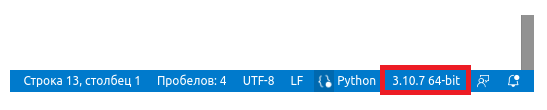

По умолчанию используется **глобальное окружение**. Нам нужно переключиться на только что созданное виртуальное окружение:

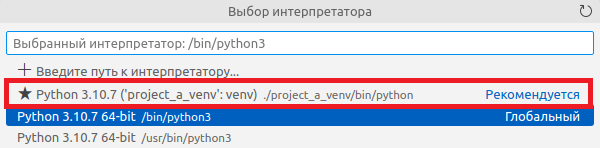

После этого необходимо перезапустить терминал (если он был открыт).

Результат будет тем же, что и после активации виртуального окружения через командную строку:

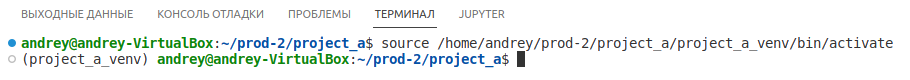

## <center>Изоляция зависимостей
Рядом с папкой `project_a` создайте ещё одну папку проекта и назовите её `project_b`. В этой папке также создайте пустой файл `app.py`.

Откройте два терминала: в первом перейдите в папку `project_a`, а во втором — в `project_b`. Также можно открыть эти папки в двух окнах `VS Code`.

В папке с проектом А создадим виртуальное окружение с именем `project_a_venv`, активируем его и установим `scikit-learn` (если вы не делали этого ранее):

```cmd
python -m venv project_a_venv
project_a_venv/Scripts/Activate.ps1
(project_a_venv)$ pip install -q scikit-learn
```

Ключ `-q` предназначен для установки без вывода справочной информации — «тихая» установка (от англ. *quiet* — тихий).

Затем создадим виртуальное окружение в папке `project_b` с именем `project_b_venv`, активируем его и установим пакет `pandas`.

```cmd
python -m venv project_b_venv
project_b_venv/Scripts/Activate.ps1
(project_b_venv)$ pip install -q pandas
```

Давайте посмотрим, какие библиотеки доступны внутри каждого из окружений. Для этого воспользуемся командой `pip freeze`, которая выводит список установленных пакетов с указанием номера их версии. Выполните в каждом из окружений команду:

Для проекта А мы увидим примерно следующую картину:

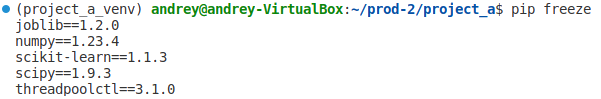

Для проекта B список будет выглядеть так:

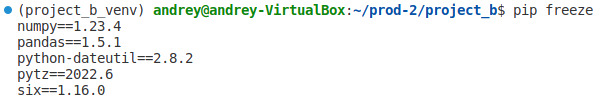

Что мы видим? Списки установленных пакетов отличаются: например, библиотеки `scikit-learn` нет в виртуальном окружении проекта B, а библиотеки `pandas` нет в виртуальном окружении проекта A. Списки пакетов для проектов А и B пересекаются только в одном — библиотеке `numpy`. Так происходит потому, что и `scikit-learn`, и `pandas` требуют для своей стандартной работы пакет numpy.

В глобальном окружении находится совершенно другой список зависимостей.

Только что мы посмотрели на пример **изоляции**: мы создали отдельные виртуальные окружения для каждого из проектов, зависимости которых изолированы друг от друга. Из приведённого примера становится интуитивно понятно, что виртуальные окружения существуют независимо от глобального и установка пакета в одно из них не означает, что пакет будет установлен в какое-то другое окружение, и наоборот.

Когда разработка проекта завершена и мы готовы загрузить его на свой *GitHub* и поделиться им с коллегами, мы можем сохранить все те версии библиотек, которые использовали при разработке, в файл. Для этого применяется всё та же команда `pip freeze`, только с указанием имени файла, в который необходимо произвести запись. Традиционно такой файл называют `requirements.txt` и располагают в корневой директории проекта. Для указания файла используется ключ `-r` или оператор `>`:

`(project_a_venv) $ pip freeze -r requirements.txt`  
или  
`(project_a_venv) $ pip freeze > requirements.txt`

Установить в него все необходимые зависимости, используя лишь одну команду:

`(имя_виртуального_окружения) $ pip install requirements.txt`

## <center>Как работает изоляция
Чтобы понять, как работает изоляция, давайте проверим, где располагаются исполняемые файлы *Python* в случае глобального и виртуального окружений.

Для начала посмотрим на глобальное окружение. С деактивированной средой запускаем команду:

`Get-Command python | Format-Table Source`

Данная команда выводит расположение скрипта, который выполняется при вызове команды `python`.

**ВИРТУАЛЬНОЕ ОКРУЖЕНИЕ ДЛЯ FLASK-ПРИЛОЖЕНИЯ**
В корневой директории проекта (у нас она называется `web`) создадим виртуальное окружение с именем `project_venv`.

`cd {path}/web`

`python -m venv project_venv`

`project_venv/Scripts/Activate.ps1`

Установим зависимости и запустим сервер:

`pip install flask requests scikit-learn`

`python ./server.py`

`python ./client.py`

Если всё работает корректно, GET- и POST-запросы отработали без ошибок, то мы можем зафиксировать версии наших зависимостей и поместить их в файл requirements.txt в корневой директории проекта:

`(project_venv) $ pip freeze > requirements.txt`
